In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
dataset = pd.read_csv('level_vs_salary_large.csv')
dataset.head(3)

,Level,Salary
0,1.0,35117
1,1.5,29030
2,2.0,37325


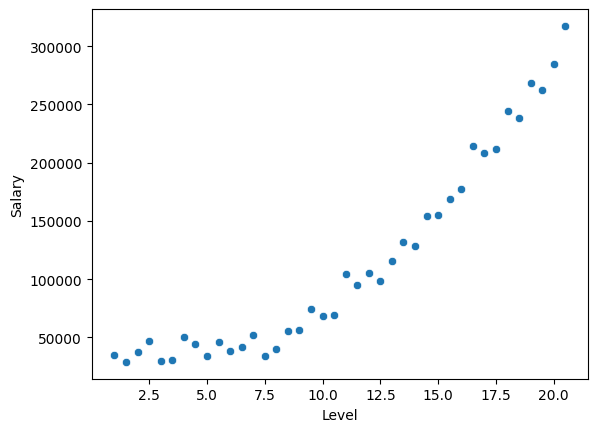

In [64]:
sns.scatterplot(x = dataset['Level'] ,y =  dataset['Salary'] , data=dataset)
plt.show()

In [65]:
x = dataset.iloc[:,:-1]
y = dataset['Salary']

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#{'criterion': 'absolute_error', 'max_depth': 12, 'splitter': 'random'}

In [101]:
dt = DecisionTreeRegressor(criterion='absolute_error' , max_depth=7 , splitter='random')
dt.fit(x_train , y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=7,
                      splitter='random')

In [102]:
dt.score(x_test , y_test)

0.9403300594785307

In [93]:
dt.score(x_train , y_train)

1.0

In [94]:
# now we can see that our test data has low accuracy now we use hyperparameter tunning to improve

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
df = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'] ,
    'splitter': ['best', 'random'] ,
    'max_depth': [i for i in range(2,20)]
    }

In [97]:
gd = GridSearchCV(DecisionTreeRegressor() , param_grid=df )

In [98]:
gd.fit(x_train , y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [99]:
gd.best_params_

{'criterion': 'absolute_error', 'max_depth': 7, 'splitter': 'random'}

In [100]:
gd.best_score_

np.float64(0.9758526841233051)